<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Experiments and Hypothesis Testing

_Authors: Alexander Egorenkov (DC)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Explain the difference between causation and correlation.
- Determine causality and sampling bias using directed acyclic graphs.
- Identify what missing data is and how to handle it.
- Test a hypothesis using a sample case study.

<a id="data-source"></a>
# Section 1: Covariance
---

Today, we’ll use advertising data from an example in the book [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).
- This is a well-known, standard introduction to machine learning.
- The book has a more advanced version — [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) — if you are comfortable with linear algebra and statistics at the graduate level.

#### Code-Along: Bring in Today's Data

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [4]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
data.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

<a id="what-are-the-featurescovariatespredictors"></a>
### What are the Features/Covariates/Predictors?

In [4]:
# A:

Click here for solution

<span style ='color:white'>

# TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars).    
# Radio: Advertising dollars spent on radio.
# Newspaper: Advertising dollars spent on mewspaper.

<a id="what-is-the-outcomeresponse"></a>
### What Is the Outcome/Response?

In [5]:
# A:

Click here for solution

<span style ='color:white'>
# Sales of a single product in a given market (in thousands of widgets).

<a id="what-do-you-think-each-row-in-the-dataset-represents"></a>
### What Do You Think Each Row in the Data Set Represents?

In [6]:
# A:

Click here for solution

<span style ='color:white'>
# Every row in the data set refers to a market where the ads have been shown.

<a id="math-review"></a>
## Math Review
---

<a id="covariance"></a>
### Covariance

#### Calculate the correlation matrix using the DataFrame's built-in `.corr()` method:

In [8]:
# A:

Click here for solution

<span style ='color:white'>
data.cov()

#### Calculate the correlation matrix using the default method.



In [ ]:
# A:

Click here for solution

<span style ='color:white'>
data.corr()

When we have a large amount of data, the correlation matrix may be too difficult to read. It can help to make a plot.

#### Use Seaborn's `.heatmap()` function to make a plot of the correlation matrix.

- Remember that we imported Seaborn as `sns`.
- To make a correlation matrix from a DataFrame, try `my_df.corr()`.

In [9]:
# A:

Click here for solution

<span style ='color:white'>
sns.set_palette("coolwarm", 7)
sns.heatmap(data.corr(), vmin=-1, vmax=1) 

Of course, looking at linear association doesn't show us the whole picture. We can get a more detailed look with a scatterplot matrix.

#### Use Seaborn's `.pairplot()` function to make joint scatterplots of the data.

- See if you can guess or [figure out](http://seaborn.pydata.org/generated/seaborn.pairplot.html) how `pairplot()` might work.
- `pairplot()` plots each column against each column of a DataFrame. So, at the minimum you must have to pass in the DataFrame you want to analyze!

In [10]:
# A:

Click here for solution

<span style ='color:white'>
sns.pairplot(data);

<a id="causation-and-correlation"></a>
## Section 2: Causation and Correlation
---

**Objective**: Explain the difference between causation and correlation.

- Think of various examples of studies you’ve seen in the media related to food:
    - "[Study links coffee consumption to decreased risk of colorectal cancer](https://news.usc.edu/97761/new-study-links-coffee-consumption-to-decreased-risk-of-colorectal-cancer/)"
    - "[Coffee does not decrease risk of colorectal cancer](http://news.cancerconnect.com/coffee-does-not-decrease-risk-of-colorectal-cancer/)"

There's a whole book series based on these [Spurious Correlations](http://www.tylervigen.com/spurious-correlations).

**So, why are these spurious correlations so common?**

- Is it because of sensational headlines?
- There's a neglect of robust data analysis.
- Causal claims and associations are difficult to convey in an unambiguous way.

The food claims above are **correlated** but may or may not be **causal**.

<a id="structure-of-causal-claims"></a>
### Structure of Causal Claims

- If X happens, Y must happen.
- If Y happens, X must have happened.
  - (You need X and something else for Y to happen.)
- If X happens, Y will probably happen.
- If Y happens, X probably happened.

> **Note:** Properties from definitions are not causal. If some a shape is a triangle, it's implied that it has three sides. However, it being a triangle does not _cause_ it to have three sides.

<a id="why-do-we-care"></a>
### Why Do We Care?

- Understanding this difference is critical for executing the data science workflow, especially when identifying and acquiring data.
- We need to fully articulate our question and use the right data to answer it while also considering any **confounders**.

> **Confounders** are unobserved variables that could affect the outcome. If we neglect to include confounding variables in an analysis, we could easily produce an inaccurate model. For example, we might falsely assume that eating more ice cream cones causes us to wear fewer layers of clothing. In actuality, eating ice cream is correlated with a confounding variable — temperature! To perform an accurate analysis, we can only conclude that ice cream consumption is _correlated with_ clothing layers.

- We don’t want to overstate what our model measures.
- Be careful not to say “caused” when you really mean “measured” or “associated.”

<a id="pearlean-causal-dag-model"></a>
## The Pearlean Causal Directed Acyclic Graph (DAG) Model

---
### Some Quick Background Notes:

- This model is a visual tool to help us reason about causality and association.
- It was proposed by Judea Pearl, although there are many similar models.
- We will only scratch the surface, so look into other resources if you're interested in learning more.
    - We'll cover the basic idea and most notable cases.
    - We won't talk about the formal mathematics or underlying probability, or how to use d-seperation to infer causality.

<a id="what-is-a-dag"></a>
### What Is a DAG?
- DAG stands for directed acyclic graph; it's a collection of nodes connected by lines. 
- Each line has an arrow to point in a direction.
- If you follow the arrows, you reach a final node. There are no loops.

A single circle or node in a causal DAG represents an event; something that happens at one point in time.

![](./assets/images/dag1.png)

Let's pretend random variables X and Y — or two different types of events — are correlated with each other.

**What are the possible causal structures that would produce this correlation?**

- X causes Y.
- Y causes X.
- There is no actual causation.
- X or Y indirectly causes the other.
- There is a third factor that causes both.
- X and Y cause a third factor, but our data collect the third factor unevenly.

<a id="its-possible-that-x-causes-y"></a>
### X causes Y.
![](./assets/images/x-cause-y.png)

In [5]:
# Example where X is a function of Y:
X = np.random.randn(100)
Y = 5 + 2*X + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

#### Make a pairplot of the data -- remember that pairplot() takes in a DataFrame!

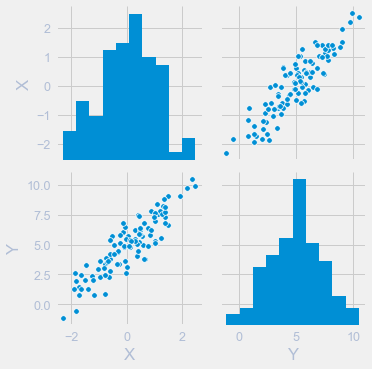

In [6]:
# A:
sns.pairplot(dag)

Click here for solution

<span style ='color:white'>
sns.pairplot(dag)

<a id="y-causes-x"></a>
### Y causes X.
![](./assets/images/y-cause-x.png)

In [7]:
# Example where X is a function of Y:
Y = np.random.randn(100)
X = 5 + 2*Y + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

#### Make a pairplot of the data:

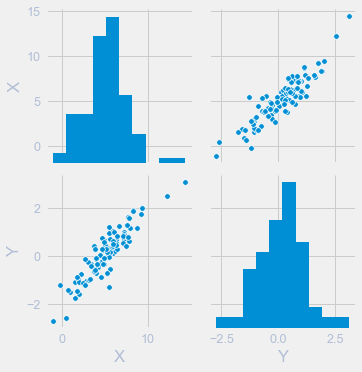

In [8]:
# A:
sns.pairplot(dag)

Click here for solution

<span style ='color:white'>
sns.pairplot(dag)

<a id="the-correlation-between-x-and-y-is-not-statistically-significant"></a>
### The correlation between X and Y is not statistically significant.
![](./assets/images/xy.png)

In [9]:
# No correlation between X and Y:
X = np.random.randn(100)
Y = 5 + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

#### Make a pairplot of the data:

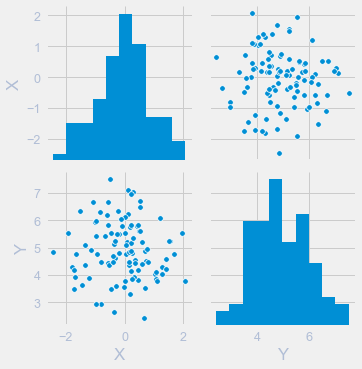

In [11]:
# A:
sns.pairplot(dag)

Click here for solution

<span style ='color:white'>
sns.pairplot(dag)

<a id="x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable"></a>
### X or Y may cause one or the other indirectly through another variable.
![](./assets/images/x-c-z-y.png)

In [6]:
# Y is a function of Z, and Z is a function of X:
X = 5 + np.random.randn(100)
Z = X + 0.1*np.random.randn(100)
Y = 3 + Z + np.random.randn(100)

dag = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})

#### Make a pairplot of the data:

In [ ]:
# A:

Click here for solution

<span style ='color:white'>
sns.pairplot(dag)

<a id="there-is-a-third-common-factor-that-causes-both-x-and-y"></a>
### There is a third common factor that causes both X and Y.
![](./assets/images/z-cause-xy.png)

In [11]:
# Both X and Y are functions of Z:
Z = np.random.randn(100)

X = 5 + 2*Z + np.random.randn(100)
Y = 3 + 3*Z + np.random.randn(100)
common_cause = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})

#### Make a pairplot of the data:

In [13]:
# A:

Click here for solution

<span style ='color:white'>
sns.pairplot(common_cause)

<a id="both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly"></a>
### X and Y cause a third factor, but our data collect the third factor unevenly.

![](./assets/images/xy-causez.png)

In [15]:
# Z is a function of X and Y:
X = 5 + np.random.randn(100)
Y = 3 + np.random.randn(100)
Z = X + Y + 0.1*np.random.randn(100)
common_effect = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})

#### Make a pairplot of the data:

In [17]:
# A:

Click here for solution

<span style ='color:white'>
sns.pairplot(common_effect)

Generally, recovering the causality structure from a correlation matrix is difficult or at times impossible. However, thinking through causal effects can give you a much better intuition regarding your variables and your data.

### What Is a "Confounder"?

Let’s say we performed an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer?

As we've noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.
![](./assets/images/smoke-lighter-cancer.png)

If we believe the structure above, conditioning on smoking by only looking at non-smokers removes the correlation between lighters and cancer.

### Code-Along: Explore the Associations in the Advertising Data

#### Visualize the relationship between the features and the response using scatterplots.

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. 
- Using this as an example, can you also make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`?
- `axs[0]` is the first coordinate grid, `axs[1]` is the second coordinate grid, etc.

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(10, 6));

In [23]:
# A:

Click here for solution

<span style ='color:white'>
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(10, 6));
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1]);
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

#### Is there a relationship between ads and sales? Which type of ads?

In [18]:
# A:

Click here for solution

<span style ='color:white'>
# There appears to be a relationship. The relationship appears strongest between TV and sales.

#### Can we say this a causal relationship?

In [19]:
# A:

Click here for solution

<span style ='color:white'>
# No, we can't demostrate causality.

#### What other questions might we want to know about this data?

In [20]:
# A:

Click here for solution

<span style ='color:white'>
# How strong is that relationship?
# Which ad types contribute to sales?
# What is the effect of each ad type on sales?
# Given ad spending in a particular market, can sales be predicted?

### Group Exercise: Evaluate Which Type of Ad is Associated With Higher Sales

Let's say we want to evaluate which type of ad is associated with higher sales.

1. Draw a basic DAG on your table or whiteboard.
    - Think about other variables that may predict sales.
    - Think about confounders.
    - Think about the downstream effects changing investment in advertising.
    - Be ready to share an example.

In [ ]:
# A:

### Section Summary

1) **It's importlant to have deep subject area knowledge.** You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be wrong.

2) **A DAG (directed acyclic graph) can be a handy tool for thinking through the logic of your models.**

3) **There is a distinction between causation and correlation.** In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent — especially in cutting-edge fields where there are many other unknown variables.

4) **Good data are essential.** Throughout this course we will be developing your data intuition so you can spot gaps and bias more readily. You'll also be introduced to tools that can help. However, your analysis is only as good as your understanding of the problem and the data.

## Section 3: Class Challenge: A/B Testing Hypothesis Tests

<a id="scenario"></a>

---

### Scenario

You are a data science team working for a web-based company and you are planning to roll out a new website design. One of two competing designs were presented to random samples of users, and their ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases and if the result is statistically significant.

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline
np.random.seed(42)

In [26]:
# Generate some data and randomize.

# Some people bought nothing, the others bought 
# with some distribution.
data1 = [0] * 50
data1.extend(np.random.normal(14, 4, 150))
np.random.shuffle(data1)

# The second design hooked less people, 
# but those that were hooked bought more stuff.
data2 = [0] * 100
data2.extend(np.random.normal(20, 5, 100))
np.random.shuffle(data2)

# Make a DataFrame.
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head() 

,A,B
0,14.685473,25.666710
1,20.152146,0.000000
2,14.274252,18.370134
3,12.122102,26.632519
4,18.228489,25.862179


#### Plot out the distributions of group A and group B.

- Plot a histogram of ONLY the group A column, and ONLY the group B column.

In [23]:
# A:

Click here for solution

<span style ='color:white'>
plt.hist(df["A"], bins=50, label="A", color=['darkblue']);
plt.ylabel("A counts");
plt.xlabel("Total Purchase");
plt.hist(df["B"], bins=50, label="B", color=['crimson']);
plt.ylabel("B counts");
plt.xlabel("Total Purchase");

#### Make a box plot of the two groups:

In [26]:
# A:

Click here for solution

<span style ='color:white'>
df.plot.box();
plt.ylabel("Total Purchase");

#### Are our data sets (approximately) normal? Use what we learned in the previous lesson to decide:

In [27]:
# A:

Click here for solution

<span style ='color:white'>
import seaborn as sns
sns.distplot(df["A"]);
sns.plt.show();

sns.distplot(df["B"]);
sns.plt.show();

<a id="statistical-tests"></a>
### Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

**Each test makes various assumptions:**
* ANOVA assumes the residuals are normally distributed and data have equal variances.
* The Welch t-test assumes normal distributions but not necessarily equal variances and more effectively accounts for small sample sizes.
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, producing a weaker p value.

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (producing stronger p values) but can be misleading with data sets that don't satisfy the assumptions.

#### Which test is most appropriate for our data?

In [28]:
# A:

Click here for solution

<span style ='color:white'>

# Check the variance of both data sets, if roughly equal ANOVA is appropriate
df.var()

# Check size of dataset, if small then Welch t-test is most appropriate, if large (>20) then chose Mann-Whitney
df.shape




In statistics, **one-way analysis of variance** (abbreviated one-way **ANOVA**) is a technique used to compare the means of three or more samples (using the **F distribution**). The **ANOVA** tests the **null hypothesis** (the default position that there is no relationship) that samples in two or more groups are drawn from populations with the same mean values. Typically, however, the **one-way ANOVA** is used to test for differences among at least three groups, as the two-group case can be covered by a **t-test**. When there are only two means to compare, the **t-test** and the **F-test** are equivalent.

> **Note:** 
   - One-way ANOVA: An ANOVA hypothesis tests the difference in population means based on one characteristic or factor.
   - Two-way ANOVA: An ANOVA hypothesis tests comparisons between populations based on multiple characteristics.

#### Use the Mann-Whitney test on our data.

- Look up the function in SciPy [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).
- Statistic: Float the Mann-Whitney U statistic — equal to min(U for x, U for y) if alternative is equal to none (deprecated; exists for backward compatibility) — and U for Y otherwise.
- P value: Float p value assuming an asymptotic normal distribution — one sided or two sided, depending on the choice of alternative.

In [29]:
# A:

Click here for solution

<span style ='color:white'>

u, p = stats.mannwhitneyu(df["A"], df["B"])

print(u)
print(p)

The Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis of whether it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

Unlike the t-test, it does not require the assumption of normal distributions. It is also nearly as efficient as the t-test on normal distributions.

<a id="interpret-your-results"></a>
### Interpret Your Results
* Is there a significant difference in the mean total purchases in the two designs?
* Which design do you recommend? Why? 
* Write two sentences explaining your results and your recommendation.

In [30]:
# A:

Click here for solution

<span style ='color:white'>
# The difference between total purchases is not significant.
# In terms of total purchases, there is no recommendation to be made, but we can think about the 
# wide difference in click-through rates and what it means it terms of selection bias.
# Ideally, we could learn from these designs and make a third design that attracts both 
# the high- and low-volume purchasers.